# Project 2

In this project you will be implementing the linear regression algorithm.

Run the following code cell to import the necessary utility and test functions.

In [1]:
import os
%tensorflow_version 2.x 
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

if not os.path.isdir('MATH448001'):
    !git clone https://github.com/CihanSoylu/MATH448001.git

from MATH448001.project_tests import project_2_tests
from MATH448001.project_utils import project_2_utils

TensorFlow 2.x selected.
Cloning into 'MATH448001'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 133 (delta 79), reused 95 (delta 43), pack-reused 0
Receiving objects: 100% (133/133), 22.75 KiB | 4.55 MiB/s, done.
Resolving deltas: 100% (79/79), done.


# Exercise 1 (10 points)

The weights of a neural network are randomly initialized in the beginning of training. There are different ways to initialize the weights. One popular method is called `GlorotUniform` which initializes a weight matrix of shape $(n_{in}, n_{out})$ by sampling from a uniform distribution over $[-l, l]$ where 
$$
l = \sqrt{\frac{6}{n_{in}+n_{out}}}
$$

Implement a function that takes integers `n_in, n_out` as its arguments and returns a random numpy array of shape `(n_in, n_out)` sampled from the uniform distribution above. 

The biases are assigned to zero matrix of shape `(1, n_out)`. 

Hint: [`np.random.uniform`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html)

In [0]:
def initialize_weights_and_biases(n_in, n_out):
    ''' Initialize the weights and biases
    Arguments:
    layer_sizes: list of layer dimensions including input and output layers.

    Returns:
    W: The weights, a numpy array of shape (n_in, n_out)
    b: The biases, a numpy array of shape (1, n_out)
    '''
    
    np.random.seed(seed = 1)
    
    ########## Your Code goes here #############

    
    ############################################
    
    return W, b

In [0]:
project_2_tests.test_initialize_weights_and_biases(initialize_weights_and_biases)

# Exercise 2 (10 points)

**Forward pass**

The linear regression model is shown in the following figure:

![linear regression](https://drive.google.com/uc?export=view&id=1ylxsSWZ_qGMNtooA0-kgcRigBF-PYA1W)

The forward pass of a given input $x = [x_1, \ldots, x_n]$ is given by
$$
\begin{eqnarray}
\hat{y} & = & f_{w,b}(x) \\
& = & x \cdot w + b \\ 
& = & x_1w_1 + \ldots + x_nw_n + b \\
\end{eqnarray}
$$

Implement the `forward_pass` function below that takes inputs `x`, weights and biases as its arguments and returns the prediction $\hat{y}$. Note that your function should be able to work for multiple inputs. For example `x` can be a matrix where each row is a particular data point:
$$
X = \begin{bmatrix} x^{(1)}_1 & \ldots & x^{(1)}_n \\ \vdots & \ddots & \vdots \\ x^{(m)}_1 & \ldots & x^{(m)}_n\end{bmatrix}
$$
and in this case the output should be 
$$
\hat{y} = \begin{bmatrix} y^{(1)} \\ \vdots \\ y^{(m)} \end{bmatrix} = X \cdot w + b 
$$

In [0]:
def forward_pass(x, weights, biases):
    ''' Compute the predictions for a given set of data points
    Arguments: 
    x : a numpy array of shape (m, n)
    weights: the weight vector, a numpy array of shape (n,1)
    biases: the bias, a numpy array of shape (1,1)

    Returns:
    y_hat: the predictions, a numpy array of shape (m,1)
    '''
    ################### Your code goes here ################
    

    ########################################################

In [0]:
project_2_tests.test_forward_pass_linear_regression(forward_pass)

# Exercise 3 (10 points)

In this exercise, you will implement the mean squared error function. Recall that for a given set of data points $\mathcal{D} = \{(x^{(i)}, y^{(i)})\}_{1\leq i \leq m}$, the mean squared error as a function of the parameters $w, b$ and $\mathcal{D}$ is defined as 
$$
\mathcal{E}(f_{w,b}, \mathcal{D}) = \frac{1}{m}\sum_{i=1}^m (f_{w,b}(x^{(i)}) - y^{(i)})^2 = \frac{1}{m}\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2
$$
The function below takes two arguments:
 - `y_hat`: an array of predictions $[\hat{y}^{(1)}, \ldots, \hat{y}^{(m)}]$ corresponding to the input values $[x^{(1)}, \ldots, x^{(m)}]$. 
 - `y`: the labels corresponding to the same input values. 
Implement the mean_squared_error function with these two inputs. 

and returns the mean squared error computed using the definition above in terms of `y_hat` and `y`.

In [0]:
def mean_squared_error(y_hat, y):
    ''' Compute mean squared error
    Arguments:
    y_hat: a numpy array of shape (m,1)
    y : a numpy array of shape (m,1)

    Returns:
    loss: The mean squared error.
    '''

    ################### Your code goes here ################


    ########################################################

In [0]:
project_2_tests.test_mse(mean_squared_error)

#Exercise 4 (20 points)

**Find gradients and update parameters**

In this step you will implement a function which updates the weights and biases according to the gradient of the loss function calculated for a batch of $m$ data points. In machine learning lingo this step is called 'backpropagation'.
 
In order to update $w_k$, we first need to find the derivative of $\mathcal{E}$ with respect to $w_k$:
$$
\begin{eqnarray}
\frac{\partial \mathcal{E}}{\partial w_k} & = & \frac{1}{m}\sum_{i=1}^m\frac{\partial }{\partial w_k} (\hat{y}^{(i)} - y^{(i)})^2\\
& = & \frac{2}{m}\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)}) \frac{\partial \hat{y}^{(i)}}{\partial w_k} \\
& = & \frac{2}{m}\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)}) x^{(i)}_k
\end{eqnarray}
$$
Similarly the derivatives with respect to $b$:
\begin{eqnarray}
\frac{\partial \mathcal{E}}{\partial b} & = & \frac{1}{m}\sum_{i=1}^m\frac{\partial }{\partial b} (\hat{y}^{(i)} - y^{(i)})^2\\
& = & \frac{2}{m}\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)}) \frac{\partial \hat{y}^{(i)}}{\partial b} \\
& = & \frac{2}{m}\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})
\end{eqnarray}

Now given a mini-batch $\{(x^{(i)}, y^{(i)})\}_{i=1}^m$, the update equations for the weights are
$$
\begin{eqnarray}
w_k^{new} & = & w_k^{old} - \alpha \frac{\partial \mathcal{E}}{\partial w_k} = w_k^{old} - \alpha \frac{2}{m}\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)}) x^{(i)}_k \\
b^{new} & = & b^{old} - \alpha \frac{\partial \mathcal{E}}{\partial b} = b^{old} - \alpha \frac{2}{m}\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})
\end{eqnarray}
$$

Implement a function that computes these derivatives and updates the weight and bias accordingly. The arguments of the function are `x`, `y`, `weights`, `biases`, and `learning_rate`. Here think of $x$ as
$$
x = \begin{bmatrix} x^{(1)}_1 & \ldots & x^{(1)}_n \\ \vdots & \ddots & \vdots \\ x^{(m)}_1 & \ldots & x^{(m)}_n\end{bmatrix}
$$
and $y$ as 
$$
y = \begin{bmatrix} y^{(1)} \\ \vdots \\ y^{(m)} \end{bmatrix} 
$$

In [0]:
def update_parameters(x, y, weights, biases, learning_rate):
    ''' Update parameters according to gradients.
    Arguments:
    x: A numpy array of shape (m,n) where each row corresponding to a data point
    y: A numpy array of shape (m,1) where each number is the label for the corresponding
        row in x
    weights: The weight vector, a numpy array of shape (n,1)
    biases: The bias value, a numpy array of shape (1,1)

    Returns: 
    weights: The updated weight vector, a numpy array of shape (n,1)
    biases: The updated bias value, a numpy array of shape (1,1) 
    '''
    
    ################### Your code goes here ################
    

    
    ########################################################
    
    return weights, biases

In [0]:
project_2_tests.test_update_parameters_linear_reg(update_parameters)

# Exercise 5: (0 points)

Now let's load some data. Run the following cell to load training and test data. We will use the training data to train the model and then use the test data to test its performance. The point is that the model did not train on the test data, so the performance on the test data is an indication of the performance of the model on unseen data. 

To be able to create visualizations, the input features chosen to be one dimensional and the labels are one dimensional as well.  

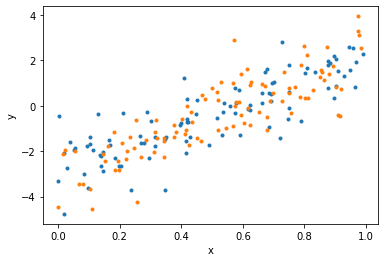

In [2]:
x_train, y_train, x_test, y_test = project_2_utils.load_regression_data()
project_2_utils.plot_regression_data(x_train, y_train)
project_2_utils.plot_regression_data(x_test, y_test)

Dataset consists on 100 training examples and 100 test examples.

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(100, 1)
(100, 1)
(100, 1)
(100, 1)


# Exercise 6 (30 points)

Now it is time to train the linear regression model on this dataset. 

**Hyperparameters**

Set hyperparameters `batch_size` and `learning_rate`. Try different values of these parameters to get a validation loss less than 0.95.

`batch_size` is the number of training data points to be used for each gradient descent update. 

In [0]:
################### Your code goes here ################
batch_size = 
learning_rate = 
########################################################

# Don't change the epochs
epochs = 100

**Train**

You are given part of the training loop below. At each epoch (the outer `for` loop), the model goes through the whole training data. At each step (the inner `for` loop), the model takes a mini-batch of training data calculate the loss and update its weights and biases using the average gradient computed on this mini-batch. After the whole training set is covered once, the epoch ends and the next epoch starts. Complete missing parts below. 

In [0]:
avg_loss = []
val_losses = []

################### Your code goes here ################
# TODO: initialize weights and biases using the initialize_weights_and_biases
#       you implemented above.
weights, biases = 
########################################################

weight_bias_memory = []

num_steps = len(x_train) // batch_size

for epoch in range(1,epochs+1):

    weight_bias_memory.append([float(weights), float(biases)])
    losses = []

    for step in range(0,num_steps):
        batch_x = x_train[step*batch_size: (step+1)*batch_size] 
        batch_y = y_train[step*batch_size: (step+1)*batch_size]
        
        ################### Your code goes here ################
        # TODO: Calculate the predictions of the model on batch_x
        y_hat = 

        # TODO: Find the mean squared error for y_hat and batch_y
        loss = 

        # TODO: Update the parameters. 
        weights, biases = 
        ########################################################
        
        losses.append(np.sqrt(loss))

    avg_loss.append(np.mean(losses))
            
    y_hat = forward_pass(x_test, weights, biases)
    val_loss = np.sqrt(mean_squared_error(y_hat, y_test))
    val_losses.append(val_loss)
    
    print("epoch %i,   Validation Loss %f, Training Loss %f" %(epoch, val_loss, np.mean(losses)))

plt.plot(val_losses, label = "Vlaidation Loss")
plt.plot(avg_loss, label = "Training loss")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.title("Learning rate =" + str(learning_rate) + " Batch size =" + str(batch_size))
plt.show()

Let's plot the progression of the regression lines. The following function plots the lines corresponding to the weights after every 10 epochs. 

In [0]:
project_2_utils.plot_regression_lines(weight_bias_memory, x_train, y_train)

The line learned by the algorithm plotted with the test data. 

In [0]:
project_2_utils.plot_regression_line(float(weights), float(biases))
project_2_utils.plot_regression_data(x_test, y_test)

Values of the learned weights and biases.

In [0]:
print('weights = ', weights)
print('biases = ', biases)

The following function plots the contours of the mean squared error function over the $(w,b)$ parameter space. The red dots are plotting the weight and bias values at each iteration. As seen from the plot, the points are approaching to the center of the plot which is corresponding to the parameters for the global minimum value of the error function.  

In [0]:
project_2_utils.plot_gradient_descent_progression(weight_bias_memory, x_train, y_train)

# Exercise 7 (10 points)

The error function for the linear regression problem is a quadratic function of the parameters and so it has a global minimum and no local minimums. Hence it is possible to find an explicit solution for the optimization problem. To this end, we first extend the data matrix `X` by adding a column of ones corresponding to bias parameter. So the function $f_{w,b}$ can be written as follows:
$$
\begin{eqnarray*}
\hat{y} & = & f_{w,b}(X) \\ 
& = & X \cdot w + b  \\
& = & \begin{bmatrix}
x^{(1)}_1 & \ldots & x^{(1)}_n & 1 \\ \vdots & \ddots & \vdots & \vdots \\ x^{(m)}_1 & \ldots & x^{(m)}_n & 1
\end{bmatrix}
\begin{bmatrix}
w_1 \\ \vdots \\ w_n \\ b
\end{bmatrix} \\
& = & \tilde{X} \cdot \tilde{w}
\end{eqnarray*}
$$
For the linear system of equations $y = \tilde{X} \cdot \tilde{w}$, the least square solution can be found as follows:
$$
\tilde{w} = \tilde{X}^+ \cdot y
$$
where $\tilde{X}^+$ is the Moose-Penrose pseudo inverse of the data matrix $\tilde{X}$. 

Implement the following function which takes the data matrix `X` and the labels `y` as its arguments and returns the least square solution using the psuedo-inverse described above. 

Hint: You can use `np.append` to create $\tilde{X}$ and `np.linalg.pinv` to find the pseudo-inverso of $\tilde{X}$. Read the documentation of `np.linalg.pinv` function which explains how the singular value decomposition is used to compute the pseudo-inverse. 

In [0]:
def explicit_solution(X, y):

    ################### Your code goes here ################


    
    ########################################################

    return w_tilde


In [0]:
project_2_tests.test_explicit_solution(explicit_solution)

Now run this function with training data as input and compare the parameter values you get with the resulting values of the gradient descent algorithm.

In [0]:
explicit_solution(x_train,y_train)

# Exercise 8 (10 points)

Let's try the algorithm you implemented on a real data set. The data is the [auto-mpg](https://archive.ics.uci.edu/ml/datasets/auto+mpg) Dataset from the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/index.php). The goal is the predict MPG (mile per gallon) from the certain features of a car. The provided features are  

'Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin' and the last feature 'Origin' is a categorical feature which takes three possible values 'USA', 'Europe' or 'Japan'. One way to turn these kind of categorical features into numbers is called `One Hot Encoding`: A new binary feature added to the data corresponding to each category. So in this case the 'Origin' feature column is replaced by three feature columns for which only one of these three feature columns is 1 corresponding to the category. See the part of the dataset below for these three features. 

Run the following code cells to load the training and the test dataset and take a look at the features.

In [0]:
df, x_train, y_train, x_test, y_test = project_2_utils.load_auto_mpg_data() 

In [0]:
df.head()

The dimensions of the data:

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Now it is time to train the linear regression model on this dataset. 

**Hyperparameters**

Set hyperparameters `batch_size` and `learning_rate`. Try different values of these parameters to get a validation loss less than 3.5.

In [0]:
################### Your code goes here ################
batch_size = 
learning_rate = 
########################################################

# Do not change the epochs
epochs = 20

**Train**

As you did above for the artificial data set, fill in the required parts in the below training loop to train a linear regression model on Auto-MPG dataset. 

In [0]:
avg_loss = []
val_losses = []

################### Your code goes here ################
# TODO: initialize weights and biases using the initialize_weights_and_biases
#       you implemented above.
weights, biases = 
########################################################

num_steps = len(x_train) // batch_size

for epoch in range(1,epochs+1):

    losses = []

    for step in range(0,num_steps):
        batch_x = x_train[step*batch_size: (step+1)*batch_size] 
        batch_y = y_train[step*batch_size: (step+1)*batch_size]
        
        ################### Your code goes here ################
        # TODO: Calculate the predictions of the model on batch_x
        y_hat = 

        # TODO: Find the mean squared error for y_hat and batch_y and append the  
        #       result to the losses list. 
        loss = 

        # TODO: Update the parameters. 
        weights, biases = 
        ########################################################
        losses.append(np.sqrt(loss))

    avg_loss.append(np.mean(losses))
            
    y_hat = forward_pass(x_test, weights, biases)
    val_loss = np.sqrt(mean_squared_error(y_hat, y_test))
    val_losses.append(val_loss)
    
    print("epoch %i,   Validation Loss %f, Training Loss %f" %(epoch, val_loss, np.mean(losses)))

plt.plot(val_losses, label = "Vlaidation Loss")
plt.plot(avg_loss, label = "Training loss")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.title("Learning rate =" + str(learning_rate) + " Batch size =" + str(batch_size))
plt.show()

In [0]:
weights, biases

Let's see how the model is doing by comparing the predictions of the model and the labels for the first 10 data points in the test set. 

In [0]:
forward_pass(x_test[:10], weights, biases)

In [0]:
y_test[:10]